# Customer Analysis Round 3
Week 1 - Day 3 - Morning/Afternoon

## Customer analysis Round 2
Dealing with the data
- Show the dataframe shape.
- Standardize header names.
- Which columns are numerical?
- Which columns are categorical?
- Check and deal with NaN values.
- Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
- BONUS: Put all the previously mentioned data transformations into a function.


In [1]:
import pandas as pd
import numpy as np

In [2]:
customer_analysis = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
print("The number of rows and columns is", customer_analysis.shape)
display(customer_analysis.info())

The number of rows and columns is (9134, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Mon

None

In [3]:
display(customer_analysis.head(10))

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


## Standardize column names
- Lower case
- No blank spaces in names
- Remove "unnamed: 0" column
- Extra: check indexes

In [4]:
def standardize_columns(df):
    '''
This functions replaces the names of the columns by the lower case version,
blank spaces for underscores '_' and drops the column "Unnamed: 0" with index values
input: data frame
    '''
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df # I had to change this part because in this version of the csv file there is no "unnamed: 0" column (before: return df.drop(['unnamed:_0'], axis=1))
def clean_columns (df):
    df = standardize_columns(df)
    df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
    df['effective_month'] = df['effective_to_date'].dt.month
    return df

In [5]:
customer_copy = customer_analysis.copy()

In [6]:
customer_copy = clean_columns(customer_copy)
customer_copy.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [7]:
display(customer_copy.columns)
index_unique = customer_copy.index.is_unique
display(index_unique)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'effective_month'],
      dtype='object')

True

In [8]:
nulls = pd.DataFrame(round(customer_copy.isna().sum()/len(customer_copy),4)*100)
display(nulls)

,0
customer,0.0
state,0.0
customer_lifetime_value,0.0
response,0.0
coverage,0.0
education,0.0
effective_to_date,0.0
employmentstatus,0.0
gender,0.0
income,0.0


Save file as 'csv'

In [30]:
customer_copy.to_csv('marketing_customer_analysis_clean.csv', index=False)

# Costumer analysis round 3 - start

EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.


In [9]:
customer_analysis_rd3 = customer_copy.copy()
customer_analysis_rd3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [10]:
customer_analysis_rd3.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
effective_month,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.000000


In [11]:
customer_analysis_rd3.astype('object').describe().T

,count,unique,top,freq
customer,9134,9134,BU79786,1
state,9134,5,California,3150
customer_lifetime_value,9134.0,8041.0,7200.664877,6.0
response,9134,2,No,7826
coverage,9134,3,Basic,5568
education,9134,5,Bachelor,2748
effective_to_date,9134,59,2011-01-10 00:00:00,195
employmentstatus,9134,5,Employed,5698
gender,9134,2,F,4658
income,9134,5694,0,2317


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

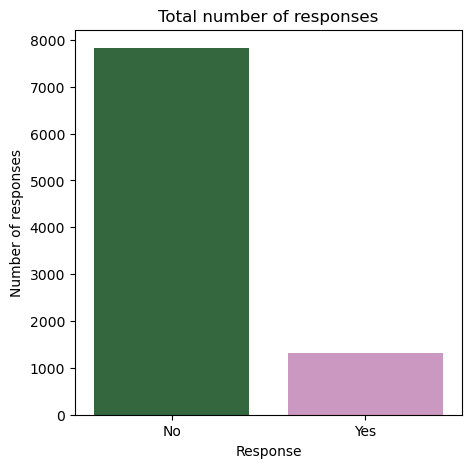

In [13]:
plt.figure(figsize=(5,5))
plot = sns.countplot(x="response",  data=customer_analysis_rd3, palette='cubehelix') 
plot.set_xlabel("Response")
plot.set_ylabel("Number of responses")
plt.title("Total number of responses")
plt.show()

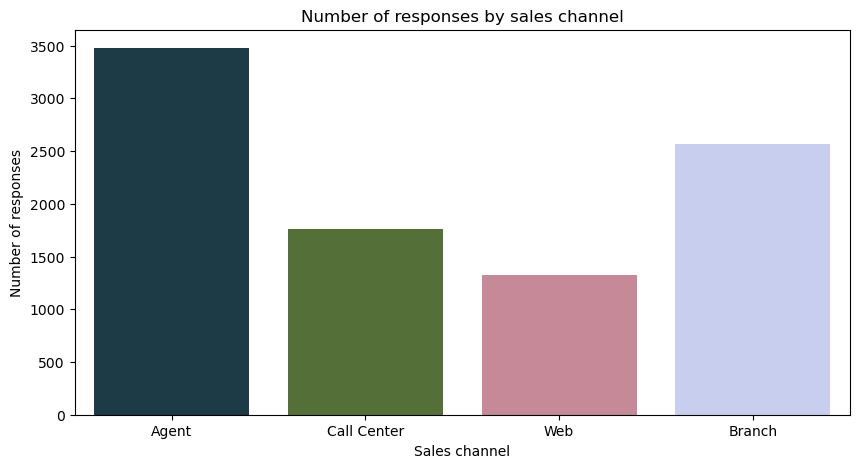

In [14]:
plt.figure(figsize=(10,5))
plot2 = sns.countplot(x="sales_channel",  data=customer_analysis_rd3, palette='cubehelix')  #other palettes "rocket", "Spectral", "coolwarm", "icefire"
plot2.set_xlabel("Sales channel")
plot2.set_ylabel("Number of responses")
plt.title("Number of responses by sales channel")
plt.show()

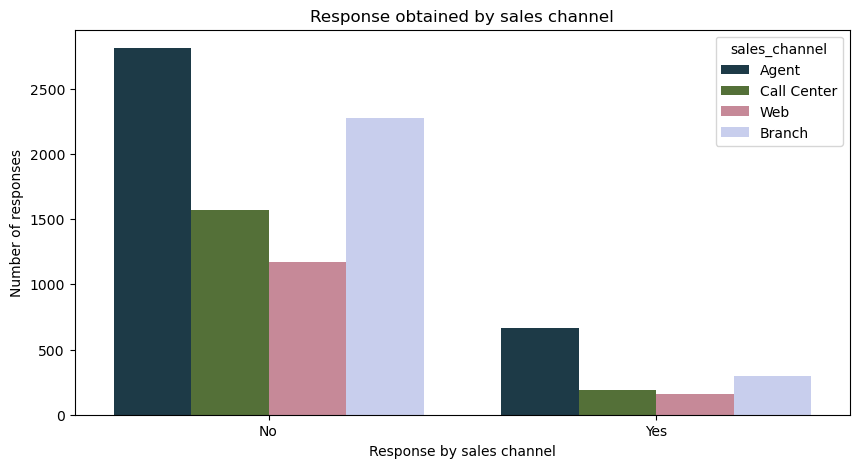

In [15]:
plt.figure(figsize=(10,5))
plot4 = sns.countplot(data=customer_analysis_rd3, x="response", hue="sales_channel", palette='cubehelix')
plot4.set_xlabel("Response by sales channel")
plot4.set_ylabel("Number of responses")
plt.title("Response obtained by sales channel")
plt.show()

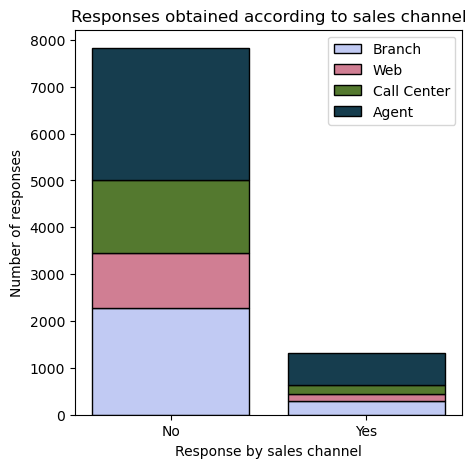

In [16]:
plt.figure(figsize=(5,5))
plot5 = sns.histplot(customer_analysis_rd3, x="response", hue="sales_channel", multiple="stack", palette='cubehelix', shrink=.8, alpha=1)
plot5.set_xlabel("Response by sales channel")
plot5.set_ylabel("Number of responses")
plt.legend(loc="best", labels=["Branch", "Web", "Call Center", "Agent"]) #labels=["Agent", "Call Center", "Web", "Branch"]
plt.title("Responses obtained according to sales channel")
plt.show()

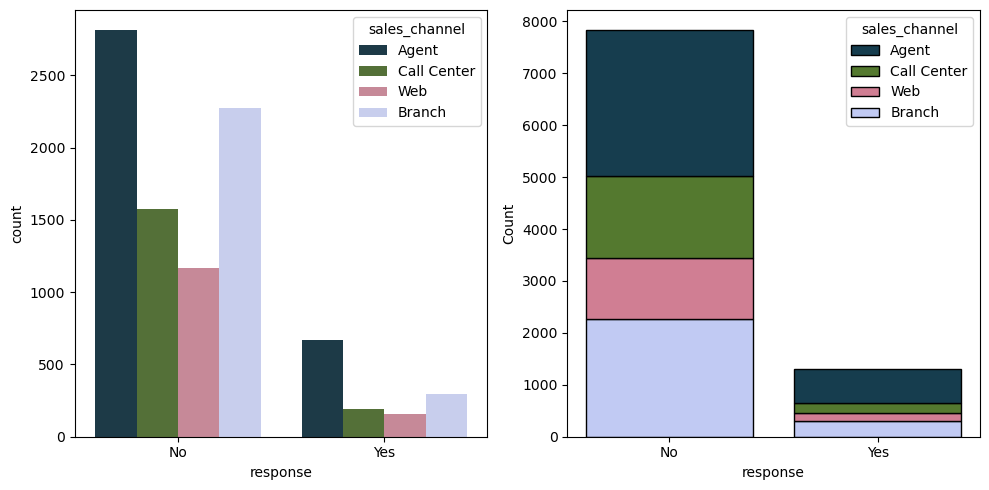

In [17]:
# This one I did it just for fun
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(data=customer_analysis_rd3, x="response", hue="sales_channel", palette='cubehelix', ax=ax[0])
sns.histplot(customer_analysis_rd3, x="response", hue="sales_channel", multiple="stack", palette='cubehelix', shrink=.8, alpha=1, ax=ax[1])
plt.tight_layout()
plt.show()


Response rate by the total claim amount.

<Figure size 1000x500 with 0 Axes>

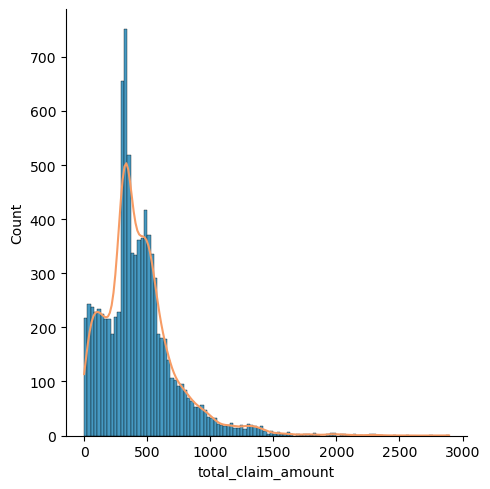

In [18]:
plt.figure(figsize=(10,5))
sns.displot(customer_analysis_rd3, x="total_claim_amount", kde=True, color="#F79C65", facecolor="#4699C2")
plt.show()

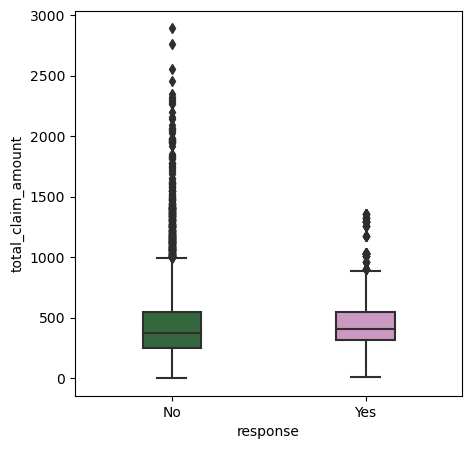

In [19]:
plt.figure(figsize=(5,5))
sns.boxplot(data=customer_analysis_rd3, x="response", y="total_claim_amount", width=.3, palette="cubehelix")
plt.show()

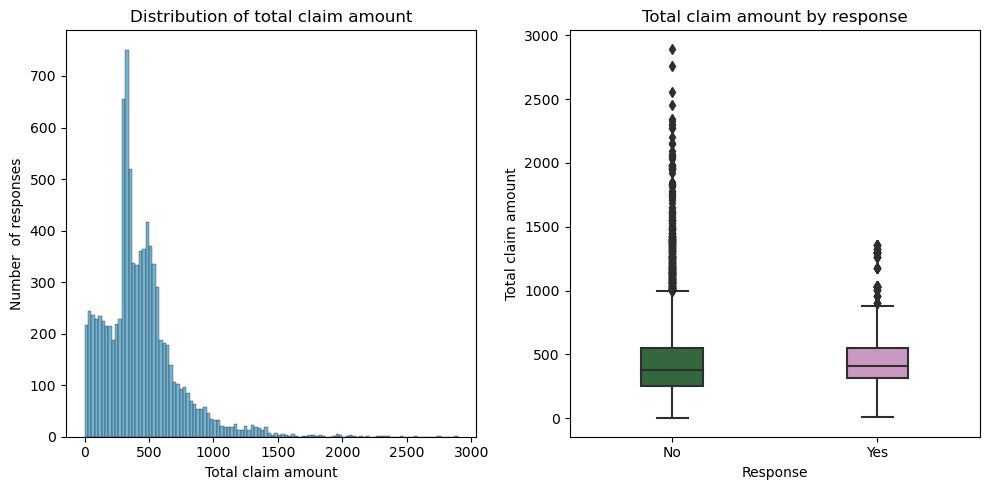

In [20]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.histplot(customer_analysis_rd3, x="total_claim_amount", color="#4699C2", ax=ax[0])
sns.boxplot(data=customer_analysis_rd3, x="response", y="total_claim_amount", width=.3, palette="cubehelix", ax=ax[1])
ax[0].set_xlabel("Total claim amount")
ax[0].set_ylabel("Number  of responses")
ax[0].set_title("Distribution of total claim amount")
ax[1].set_xlabel("Response")
ax[1].set_ylabel("Total claim amount")
ax[1].set_title("Total claim amount by response")
plt.tight_layout()
plt.show()

Response rate by income.

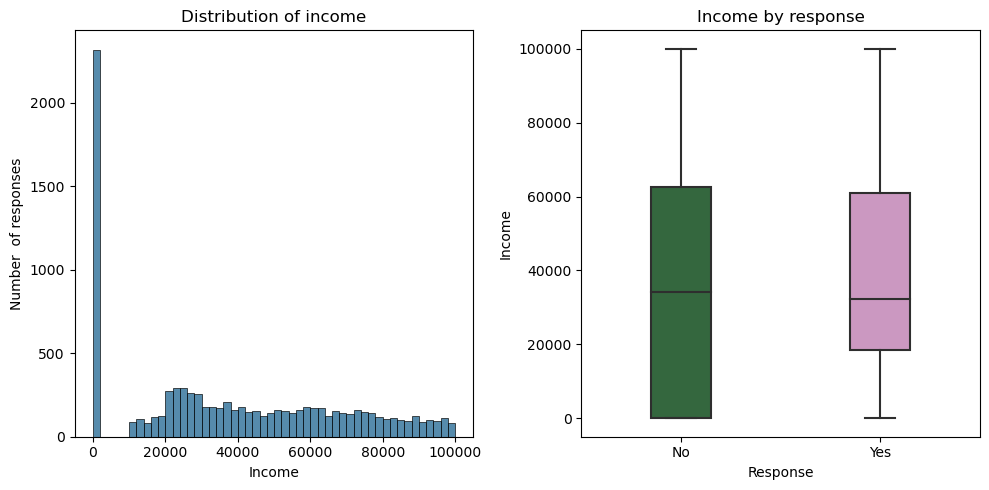

In [21]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.histplot(customer_analysis_rd3, x="income", color="#1D6590", bins=50,ax=ax[0])
sns.boxplot(data=customer_analysis_rd3, x="response", y="income", width=.3, palette="cubehelix", ax=ax[1])
ax[0].set_xlabel("Income")
ax[0].set_ylabel("Number  of responses")
ax[0].set_title("Distribution of income")
ax[1].set_xlabel("Response")
ax[1].set_ylabel("Income")
ax[1].set_title("Income by response")
plt.tight_layout()
plt.show()